In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot

In [2]:
chemin_fichier = "C:/Users/dell/Documents/1A/S2/P2/sc/inflation_uk.xlsx"

donnees = pd.read_excel(chemin_fichier)
donnees.columns  = ['Mois','Inflation']

print(donnees.head())

        Mois  Inflation
0 1993-01-01        3.0
1 1993-02-01        3.1
2 1993-03-01        3.2
3 1993-04-01        2.6
4 1993-05-01        2.3


In [3]:
donnees.tail()

,Mois,Inflation
295,2017-08-01,2.7
296,2017-09-01,2.8
297,2017-10-01,2.8
298,2017-11-01,2.8
299,2017-12-01,2.7


In [4]:
donnees.index

RangeIndex(start=0, stop=300, step=1)

In [5]:
donnees.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Mois,300,2005-06-16 08:09:36,1993-01-01 00:00:00,1999-03-24 06:00:00,2005-06-16 00:00:00,2011-09-08 12:00:00,2017-12-01 00:00:00,NaN
Inflation,300.0,2.085,0.2,1.5,2.1,2.6,4.8,0.823287


In [6]:
X = donnees['Mois']
y = donnees['Inflation']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Taille de l'échantillon d'apprentissage :", len(X_train)) 
print("Taille de l'échantillon de validation :", len(X_val))

Taille de l'échantillon d'apprentissage : 240
Taille de l'échantillon de validation : 60


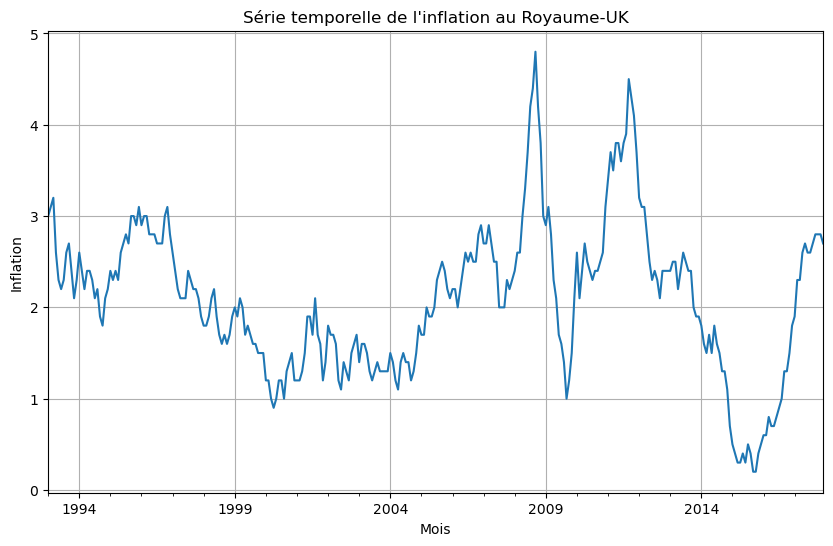

In [7]:
serie_temporelle = pd.Series(donnees['Inflation'].values, index=donnees['Mois'])

plt.figure(figsize=(10, 6))
serie_temporelle.plot()
plt.title('Série temporelle de l\'inflation au Royaume-UK')
plt.xlabel('Mois')
plt.ylabel('Inflation')
plt.grid(True)
plt.show()

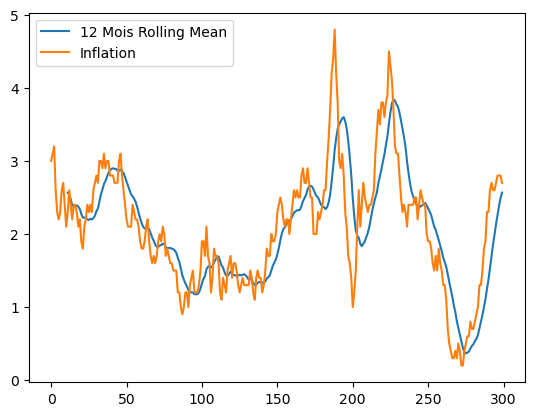

In [8]:
time_series = donnees['Inflation'] 
type(time_series)
time_series.rolling(12).mean().plot(label='12 Mois Rolling Mean')
time_series.plot()
plt.legend()

In [9]:
def adf_check(time_series):
    
    result = adfuller(time_series)
    print("Augmented Dicky-Fuller Test")
    labels = ['ADF Test Statistics','p-value','# of lags','Num of Observations']
    
    for value,label in zip(result,labels):
        print(label+ " : "+str(value))
        
    if result[1] <= 0.05:
        print("Strong evidence against null hypothesis")
        print("reject null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis")
        print("Fail to reject null hypothesis")
        print("Data has a unit root and is non-stationary")

In [10]:
adf_check(donnees['Inflation'])

Augmented Dicky-Fuller Test
ADF Test Statistics : -2.3334896125608386
p-value : 0.1613942353277148
# of lags : 12
Num of Observations : 287
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root and is non-stationary


<Axes: >

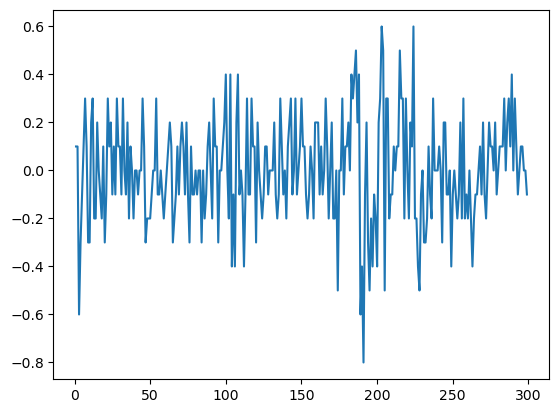

In [11]:
donnees['First Difference'] = donnees['Inflation'] - donnees['Inflation'].shift(1)
donnees['First Difference'].plot()

In [12]:
adf_check(donnees['First Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistics : -6.779314819548393
p-value : 2.523131312366415e-09
# of lags : 11
Num of Observations : 287
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


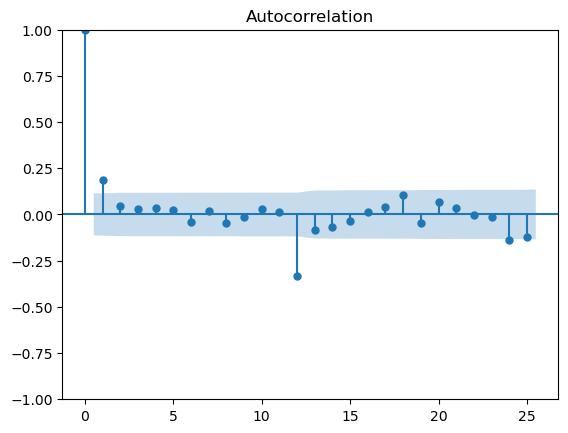

In [13]:
fig_first = plot_acf(donnees['First Difference'].dropna())

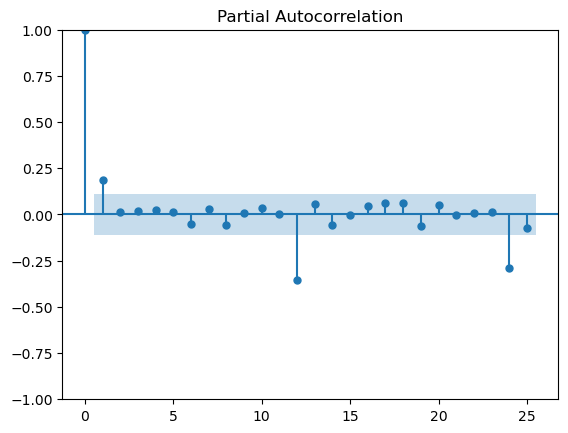

In [14]:
result = plot_pacf(donnees['First Difference'].dropna())

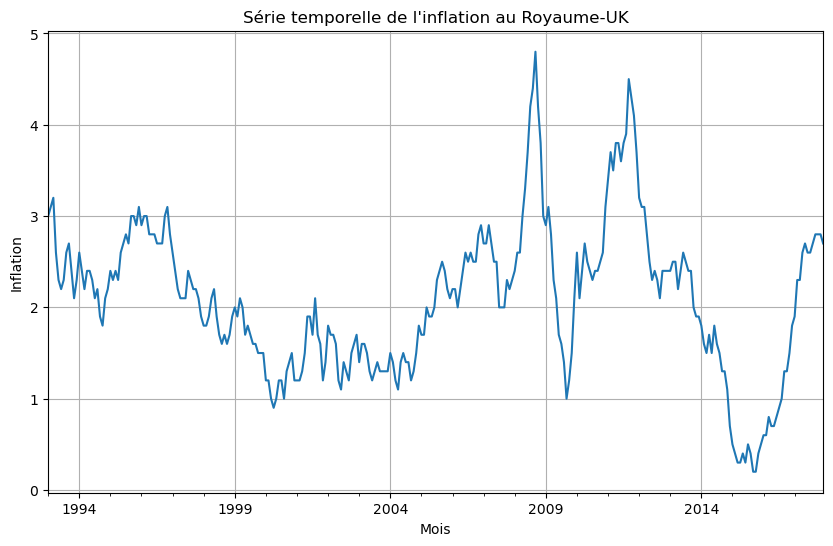

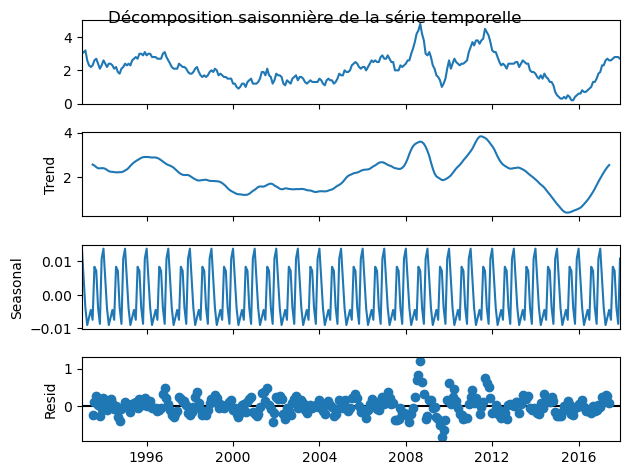

In [15]:
plt.figure(figsize=(10, 6))
serie_temporelle.plot()
plt.title('Série temporelle de l\'inflation au Royaume-UK')
plt.xlabel('Mois')
plt.ylabel('Inflation')
plt.grid(True)
plt.show()

resultats_decomposition = seasonal_decompose(serie_temporelle, model='additive')
resultats_decomposition.plot()
plt.suptitle('Décomposition saisonnière de la série temporelle')
plt.show()

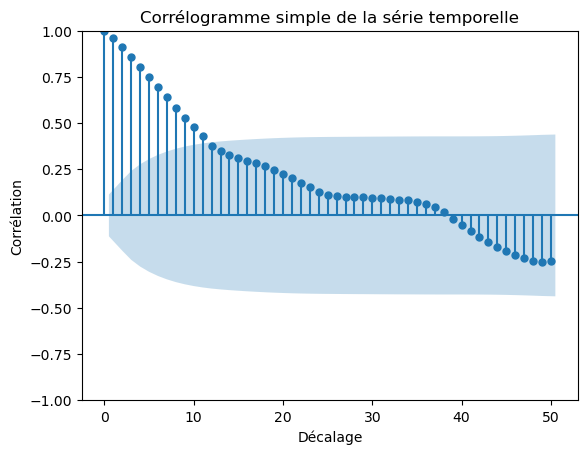

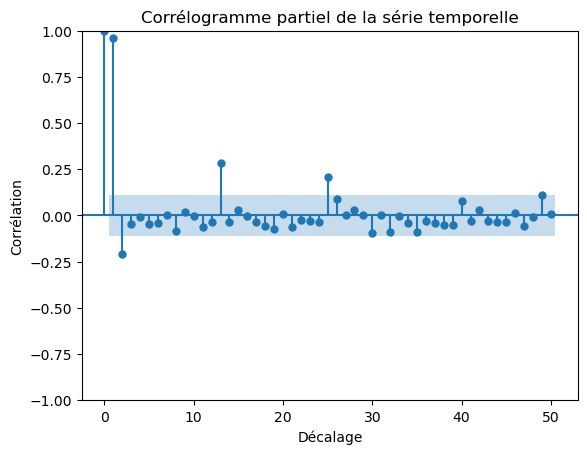

In [16]:
serie_temporelle = pd.Series(donnees['Inflation'].values, index=donnees['Mois'])

plot_acf(serie_temporelle, lags=50)
plt.title('Corrélogramme simple de la série temporelle')
plt.xlabel('Décalage')
plt.ylabel('Corrélation')
plt.show()

plot_pacf(serie_temporelle, lags=50)
plt.title('Corrélogramme partiel de la série temporelle')
plt.xlabel('Décalage')
plt.ylabel('Corrélation')
plt.show()

C:\Users\dell\anaconda34\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda34\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda34\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda34\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  300
Model:                 ARIMA(2, 1, 2)   Log Likelihood                  42.669
Date:                Sun, 12 May 2024   AIC                            -75.338
Time:                        21:02:26   BIC                            -56.835
Sample:                    01-01-1993   HQIC                           -67.932
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5035      0.188      7.984      0.000       1.134       1.873
ar.L2         -0.5304      0.185     -2.873      0.004      -0.892      -0.169
ma.L1         -1.3568      0.401     -3.387      0.0

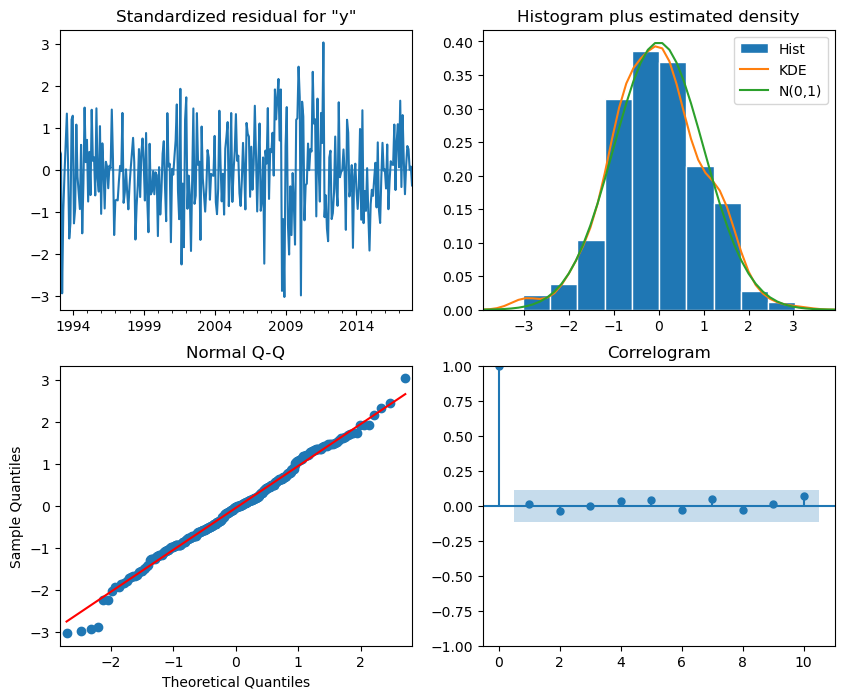

In [20]:
modele = ARIMA(serie_temporelle, order=(2,1,2)) 
resultats_modele = modele.fit()
print(resultats_modele.summary())

resultats_modele.plot_diagnostics(figsize=(10, 8))
plt.show()

C:\Users\dell\anaconda34\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\dell\anaconda34\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\dell\anaconda34\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


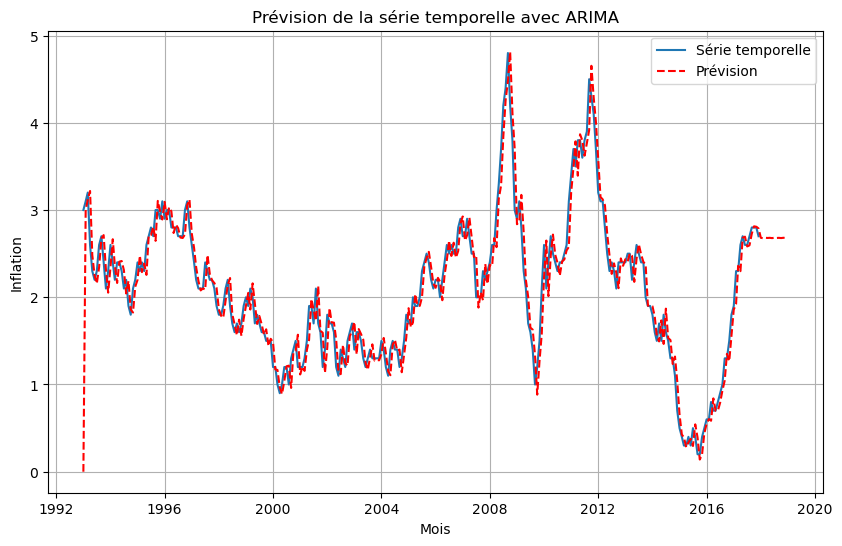

Erreur quadratique moyenne (RMSE) : 0.270360219892794
Erreur absolue moyenne (MAE) : 0.1733041206405144


In [19]:
resultats_modele = modele.fit()

prediction = resultats_modele.predict(start=0, end=len(serie_temporelle) + 12)   

plt.figure(figsize=(10, 6))
plt.plot(serie_temporelle, label='Série temporelle')
plt.plot(prediction, color='red', linestyle='--', label='Prévision')
plt.title('Prévision de la série temporelle avec ARIMA')
plt.xlabel('Mois')
plt.ylabel('Inflation')
plt.legend()
plt.grid(True)
plt.show()

rmse = np.sqrt(mean_squared_error(serie_temporelle, prediction[:len(serie_temporelle)]))
mae = mean_absolute_error(serie_temporelle, prediction[:len(serie_temporelle)])

print("Erreur quadratique moyenne (RMSE) :", rmse)
print("Erreur absolue moyenne (MAE) :", mae)